In [1]:
import pandas as pd
dataset = pd.read_csv("Pos MLs03a carro foi vendido.csv")
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
dataset.sold = dataset.sold.map({'no' : 0, 'yes' : 1})
dataset

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [3]:
from datetime import datetime
dataset["model_year"] = datetime.today().year - dataset.model_year
dataset

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,24,30941.02,1
1,1,7843,26,40557.96,1
2,2,7109,18,89627.50,0
3,3,26823,9,95276.14,0
4,4,7935,10,117384.68,1
...,...,...,...,...,...
9995,9995,15572,18,97112.86,0
9996,9996,13246,22,107424.63,1
9997,9997,13018,10,93856.99,0
9998,9998,10464,13,51250.57,1


In [4]:
dataset["km_year"] = dataset.mileage_per_year * 1.60934
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,km_year
0,0,21801,24,30941.02,1,35085.22134
1,1,7843,26,40557.96,1,12622.05362
2,2,7109,18,89627.50,0,11440.79806
3,3,26823,9,95276.14,0,43167.32682
4,4,7935,10,117384.68,1,12770.11290


In [5]:
dataset = dataset.drop(columns=["Unnamed: 0", "mileage_per_year"], axis=1)
dataset.head()

,model_year,price,sold,km_year
0,24,30941.02,1,35085.22134
1,26,40557.96,1,12622.05362
2,18,89627.50,0,11440.79806
3,9,95276.14,0,43167.32682
4,10,117384.68,1,12770.11290


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

X = dataset[["model_year", "price", "km_year"]]
y = dataset["sold"]

np.random.seed(6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(f"Quantidade de exemplos para treinamento é {len(X_train)} e para teste é {len(X_test)}")

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"A acurácia do nosso modelo foi de {acc * 100}%.")

Quantidade de exemplos para treinamento é 7000 e para teste é 3000
A acurácia do nosso modelo foi de 57.99999999999999%.


c:\tools\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\tools\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"A acurácia do nosso modelo foi de {acc * 100}%.")

c:\tools\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


A acurácia do nosso modelo foi de 71.1%.


In [62]:
from sklearn.tree import DecisionTreeClassifier

X = dataset[["model_year", "price", "km_year"]]
y = dataset["sold"]

np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(f"Quantidade de exemplos para treinamento é {len(X_train)} e para teste é {len(X_test)}")

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"A acurácia do nosso modelo foi de {acc * 100}%.")


Quantidade de exemplos para treinamento é 7000 e para teste é 3000
A acurácia do nosso modelo foi de 78.8%.


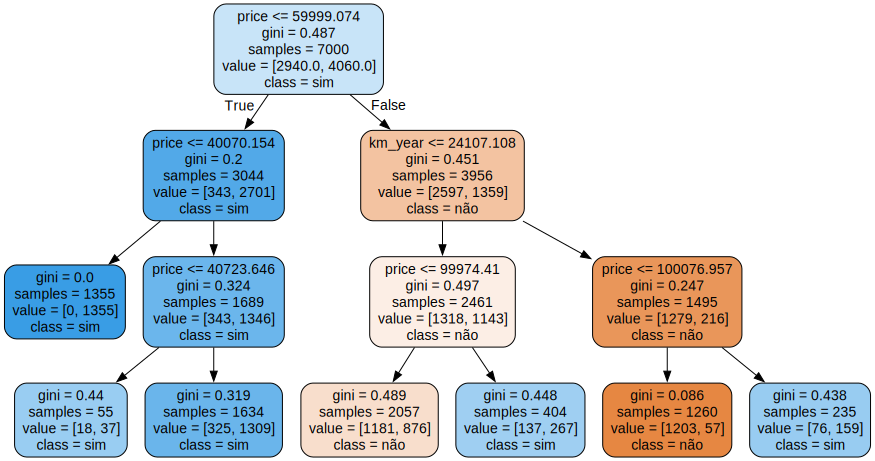

In [63]:
from sklearn.tree import export_graphviz
import graphviz

graph_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=X.columns, class_names=["não", "sim"])
graph = graphviz.Source(graph_data)
graph

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"A acurácia do nosso modelo foi de {acc * 100}%.")

A acurácia do nosso modelo foi de 78.8%.


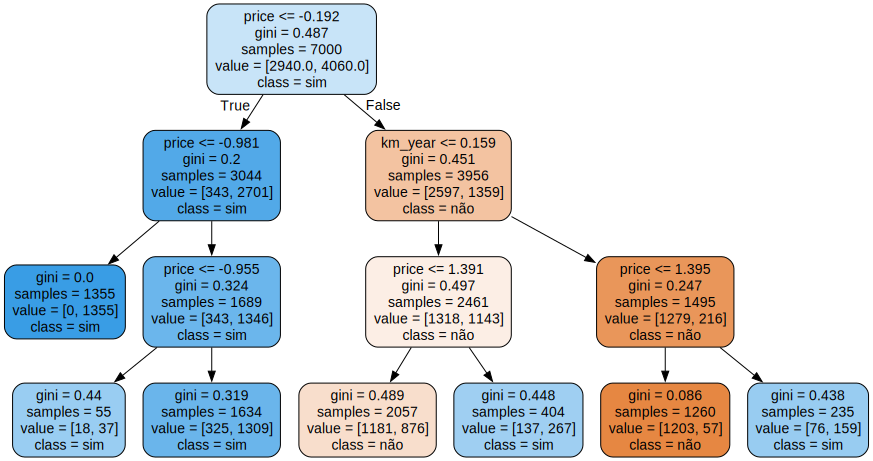

In [65]:
from sklearn.tree import export_graphviz
import graphviz

graph_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=X.columns, class_names=["não", "sim"])
graph = graphviz.Source(graph_data)
graph